### Cumulative Results For Transportation and Climate

#####  Analysis done on Robbery/ Theft Fraud Offence Types
<ol>

<li> 20.34% times crimes committed within 5 mile (manhattan distance) radius of subway stops
<li> 17.42% times crimes committed within 5 mile (manhattan distance) radius of bus stops
<li> 3.34% times it is snowing during robbery/theft
<li> 37.47% times it is raining
</ol>



In [1]:
import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
## Read Data Files
big_theft=pd.read_csv('../data/Big_Theft.csv', header=0)
drug=pd.read_csv('../data/Dangerous_drugs.csv', header=0)
weapon=pd.read_csv('../data/Dangerous_weapons.csv', header=0)
homicide=pd.read_csv('../data/Homicide.csv', header=0)
kidnap=pd.read_csv('../data/Kidnapping.csv', header=0)
small_theft=pd.read_csv('../data/Small_Theft.csv', header=0)
violence=pd.read_csv('../data/violent_behaviour.csv', header=0)
other=pd.read_csv('../data/Other.csv', header=0)
electricity=pd.read_csv('../data/Electric_Consumption_And_Cost__2010_-__2016_.csv', header=0)
event=pd.read_csv('../data/NYC_Permitted_Event_Information.csv', header=0)
historic=pd.read_csv('../data/NYPD_Complaint_Data_Historic.csv', header=0)

/Users/abc/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [176]:
crime=pd.read_csv('../data/Crime_Map_.csv', header=0)
subway=pd.read_csv('../data/NYC_Transit_Subway_Entrance_And_Exit_Data.csv', header=0)
bus=pd.read_csv('../data/Bus_Stop_Shelter.csv', header=0)
climate=pd.read_csv('../data/climate.csv', header=0, low_memory=False)

In [5]:
crime.columns

Index([u'CMPLNT_NUM', u'CMPLNT_FR_DT', u'CMPLNT_FR_TM', u'CMPLNT_TO_DT',
       u'CMPLNT_TO_TM', u'RPT_DT', u'KY_CD', u'OFNS_DESC', u'PD_CD',
       u'PD_DESC', u'CRM_ATPT_CPTD_CD', u'LAW_CAT_CD', u'JURIS_DESC',
       u'BORO_NM', u'ADDR_PCT_CD', u'LOC_OF_OCCUR_DESC', u'PREM_TYP_DESC',
       u'PARKS_NM', u'HADEVELOPT', u'X_COORD_CD', u'Y_COORD_CD', u'Latitude',
       u'Longitude', u'Lat_Lon'],
      dtype='object')

In [83]:
type_crime= set(crime['OFNS_DESC'])
print type_crime
theft_set=set(['THEFT-FRAUD', 'ROBBERY'])


set(['ALCOHOLIC BEVERAGE CONTROL LAW', nan, 'KIDNAPPING', 'PETIT LARCENY OF MOTOR VEHICLE', 'ADMINISTRATIVE CODE', 'FRAUDS', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'ESCAPE 3', 'UNAUTHORIZED USE OF A VEHICLE', 'PROSTITUTION & RELATED OFFENSES', 'ROBBERY', 'BURGLARY', 'OFFENSES AGAINST PUBLIC ADMINI', 'SEX CRIMES', 'RAPE', 'HOMICIDE-NEGLIGENT-VEHICLE', 'ASSAULT 3 & RELATED OFFENSES', 'OFFENSES INVOLVING FRAUD', 'PETIT LARCENY', 'OTHER STATE LAWS', "BURGLAR'S TOOLS", 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'THEFT-FRAUD', 'INTOXICATED & IMPAIRED DRIVING', 'CRIMINAL MISCHIEF & RELATED OF', 'GAMBLING', 'FRAUDULENT ACCOSTING', 'JOSTLING', 'DANGEROUS DRUGS', 'VEHICLE AND TRAFFIC LAWS', 'OTHER OFFENSES RELATED TO THEF', 'ARSON', 'ANTICIPATORY OFFENSES', 'OFFENSES AGAINST THE PERSON', 'HARRASSMENT 2', 'FORGERY', 'POSSESSION OF STOLEN PROPERTY', 'OTHER STATE LAWS (NON PENAL LA', 'MISCELLANEOUS PENAL LAW', 'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST PUBLIC SAFETY', 'ENDAN WELFARE INCOMP', 'FELONY ASSA

In [87]:
print subway.columns


Index([u'Division', u'Line', u'Station Name', u'Station Latitude',
       u'Station Longitude', u'Route1', u'Route2', u'Route3', u'Route4',
       u'Route5', u'Route6', u'Route7', u'Route8', u'Route9', u'Route10',
       u'Route11', u'Entrance Type', u'Entry', u'Exit Only', u'Vending',
       u'Staffing', u'Staff Hours', u'ADA', u'ADA Notes', u'Free Crossover',
       u'North South Street', u'East West Street', u'Corner',
       u'Entrance Latitude', u'Entrance Longitude', u'Station Location',
       u'Entrance Location'],
      dtype='object')


In [129]:
climate.columns

Index([u'STATION', u'NAME', u'LATITUDE', u'LONGITUDE', u'ELEVATION', u'DATE',
       u'AWND', u'AWND_ATTRIBUTES', u'DAPR', u'DAPR_ATTRIBUTES', u'DASF',
       u'DASF_ATTRIBUTES', u'MDPR', u'MDPR_ATTRIBUTES', u'MDSF',
       u'MDSF_ATTRIBUTES', u'PGTM', u'PGTM_ATTRIBUTES', u'PRCP',
       u'PRCP_ATTRIBUTES', u'SNOW', u'SNOW_ATTRIBUTES', u'SNWD',
       u'SNWD_ATTRIBUTES', u'TAVG', u'TAVG_ATTRIBUTES', u'TMAX',
       u'TMAX_ATTRIBUTES', u'TMIN', u'TMIN_ATTRIBUTES', u'TOBS',
       u'TOBS_ATTRIBUTES', u'WDF2', u'WDF2_ATTRIBUTES', u'WDF5',
       u'WDF5_ATTRIBUTES', u'WESD', u'WESD_ATTRIBUTES', u'WESF',
       u'WESF_ATTRIBUTES', u'WSF2', u'WSF2_ATTRIBUTES', u'WSF5',
       u'WSF5_ATTRIBUTES', u'WT01', u'WT01_ATTRIBUTES', u'WT02',
       u'WT02_ATTRIBUTES', u'WT03', u'WT03_ATTRIBUTES', u'WT04',
       u'WT04_ATTRIBUTES', u'WT05', u'WT05_ATTRIBUTES', u'WT06',
       u'WT06_ATTRIBUTES', u'WT08', u'WT08_ATTRIBUTES', u'WT09',
       u'WT09_ATTRIBUTES', u'WT10', u'WT10_ATTRIBUTES', u'WT11',
   

In [171]:
theft=crime[crime['OFNS_DESC'].isin(theft_set)]
print len(theft)

9033


In [172]:
theft = theft[np.isfinite(theft['Longitude'])]


In [136]:
loc={}
for i in range(len(subway)):
    name = str(subway['Entrance Longitude'][i])+' '+str(subway['Entrance Latitude'][i])
    if name in loc:
        loc[name][1] +=1
    else:
        loc[name]=[0,0]  #
print 'done creating dict'    
false=0
true=0
count =0
for i in theft['Latitude'].keys():
    for key in loc:
        
        c1, c2= key.split(' ')
        x,y=theft['Longitude'][i], theft['Latitude'][i]
        
        if (abs(x-float(c1)) + abs(y-float(c2))) <= (5.0/60.0):
            loc[key][0] += 1
            true +=1
            
        else:
            false +=1
    count +=1
    if count%100==0: print count
    
            



done creating dict
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000


In [137]:
(true*1.0)/(true+false)

0.20337074358060414

In [138]:
bus.columns

Index([u'SHELTER_ID', u'the_geom', u'CORNER', u'LOCATION', u'AT_BETWEEN',
       u'IN_SERVICE', u'LONGITUDE', u'LATITUDE'],
      dtype='object')

In [141]:
loc2={}
for i in range(len(bus)):
    name = str(bus['LONGITUDE'][i])+' '+str(bus['LATITUDE'][i])
    if name in loc2:
        loc2[name][1] +=1
    else:
        loc2[name]=[0,0]  #
print 'done creating dict'    
false=0
true=0
count =0
for i in theft['Latitude'].keys():
    for key in loc2:
        
        c1, c2= key.split(' ')
        x,y=theft['Longitude'][i], theft['Latitude'][i]
        
        if (abs(x-float(c1)) + abs(y-float(c2))) <= (5.0/60.0):
            loc2[key][0] += 1
            true +=1
            
        else:
            false +=1
    count +=1
    if count%100==0: print count

done creating dict
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000


In [142]:
(true*1.0)/(true+false)

0.1741908352160456

In [173]:
theft['from'] = pd.to_datetime(theft['CMPLNT_FR_DT'],  format='%m/%d/%Y',dayfirst=False, yearfirst=False, errors='coerce')


In [177]:
climate=climate[climate['NAME']=='NY CITY CENTRAL PARK, NY US']

In [178]:
climate['DATE'] = pd.to_datetime(climate['DATE'], format='%Y-%m-%d')

In [180]:
theft['index']=theft['from']
climate['index']=climate['DATE']


In [200]:
climate_crime = pd.merge(  theft, climate,on='index' ,how='outer')
climate_crime = climate_crime[np.isfinite(climate_crime['Longitude'])]

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline
import collections 
sno=collections.Counter(climate_crime['SNOW'])

In [212]:
snow={0.0:0}
for key in sno:
    if not np.isfinite(key):
        snow[0.0]+=1
    else:
        snow[key]=sno[key]
print 1-((snow[0.0]*1.0)/sum(snow.values()))

0.0334366696191


In [213]:
snow

{0.0: 8730,
 0.40000000000000002: 6,
 0.59999999999999998: 38,
 0.80000000000000004: 1,
 1.0: 37,
 1.2: 58,
 1.3999999999999999: 1,
 1.5: 1,
 2.1000000000000001: 51,
 2.7999999999999998: 1,
 4.2999999999999998: 1,
 4.5: 1,
 4.7999999999999998: 2,
 5.0: 1,
 5.0999999999999996: 39,
 5.5: 1,
 7.5999999999999996: 29,
 9.4000000000000004: 31,
 11.0: 3}

In [238]:
rai=collections.Counter(climate_crime['PRCP'])
rain={0.0:0}
for key in rai:
    if not np.isfinite(key):
        rain[0.0]+=1
    else:
        rain[key]=rai[key]
print 1-((rain[0.0]*1.0)/sum(rain.values()))

0.374737075169


In [239]:
rain

{0.0: 5648,
 0.01: 300,
 0.02: 336,
 0.029999999999999999: 194,
 0.040000000000000001: 97,
 0.050000000000000003: 178,
 0.059999999999999998: 247,
 0.070000000000000007: 10,
 0.080000000000000002: 36,
 0.089999999999999997: 63,
 0.10000000000000001: 155,
 0.11: 47,
 0.12: 105,
 0.13: 32,
 0.14000000000000001: 30,
 0.14999999999999999: 1,
 0.16: 9,
 0.17000000000000001: 52,
 0.17999999999999999: 83,
 0.19: 2,
 0.20000000000000001: 1,
 0.20999999999999999: 53,
 0.22: 1,
 0.25: 3,
 0.26000000000000001: 50,
 0.27000000000000002: 38,
 0.28999999999999998: 95,
 0.29999999999999999: 1,
 0.31: 56,
 0.32000000000000001: 40,
 0.33000000000000002: 4,
 0.34000000000000002: 53,
 0.34999999999999998: 44,
 0.35999999999999999: 1,
 0.38: 1,
 0.39000000000000001: 14,
 0.40000000000000002: 1,
 0.44: 1,
 0.45000000000000001: 1,
 0.46000000000000002: 53,
 0.46999999999999997: 11,
 0.47999999999999998: 1,
 0.48999999999999999: 1,
 0.5: 11,
 0.52000000000000002: 60,
 0.54000000000000004: 45,
 0.560000000000

In [222]:
t1=np.array(loc.values())
t2=np.array(loc2.values())


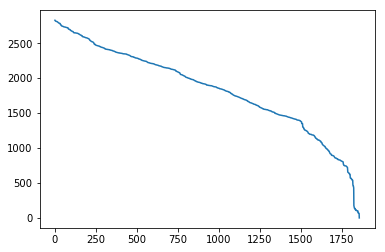

In [233]:
t1=t1[t1[:,1].argsort()[::-1]]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(t1)),t1[:,1])